# 資料前處理(Missing data, One-hot encoding, Feature Scaling)
資料的品質、特徵的選取決定了機器學習的上限，模型(Model)只是逼近這個上限。<br>
雖然在學術界總是以Model為主要討論對象，但實際上在業界80%的時間都是在對資料進行前處理，<br>
包含了資料獲取、清理、特徵選擇、特徵處理…到這裡我們可以稍微了解資料前處理的重要性。<br>

常見的資料前處理如下所示：<br>
1.缺失值的處理<br>
2.類別資料的處理（有序、無序）<br>
3.資料特徵縮放<br>

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from io import StringIO
import math

## 1. 缺失值的處理
缺值主要處理方式有兩種：<br>
方法一：丟棄（ if 資料量夠多 ）<br>
方法二：補值（ if 資料量少 ）<br>

In [2]:
csv_data = '''A,B,C,D,E
            5.0,2.0,3.0,,6
            1.0,6.0,,8.0,5
            0.0,11.0,12.0,4.0,5
            3.0,,3.0,5.0,
            5.0,1.0,4.0,2.0,4
           '''
df = pd.read_csv(StringIO(csv_data))

In [3]:
df = pd.read_csv('preText.csv')

In [4]:
df

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


## 方法一 ：Missing Data(空值資料處理)

使用Pandas去空值的方法“dropna”，dropna預設只要任一欄位有空值，就會整筆刪掉。<br>
可透過參數來調整，像是把how設為all，就是要全部為空才清掉，或是用subset指定當某一欄為空時才刪。

In [5]:
df.dropna()

,A,B,C,D,E
2,0.0,11.0,12.0,4.0,5.0
4,5.0,1.0,4.0,2.0,4.0


In [6]:
df # 不過原始資料不變

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [7]:
# 透過參數來調整e.g. 把how設為all，就是要全部為空才清掉
df.dropna(how = 'all')

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


In [8]:
# subset指定當某一欄為空時才刪
df.dropna(subset = ['C'])

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,NaN,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


## 方法二 ：
補值則使用fillna函式即可，依照以下範例即可補上固定值0、平均數、眾數、中位數…

In [9]:
df.fillna(0) # 不改變原df, 可print(df)

,A,B,C,D,E
0,5.0,2.0,3.0,0.0,6.0
1,1.0,6.0,0.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,0.0,3.0,5.0,0.0
4,5.0,1.0,4.0,2.0,4.0


In [10]:
df['B'].fillna(df['B'].mean()) # B那欄有4個值, sum=20, 20/4 = mean = 5

0     2.0
1     6.0
2    11.0
3     5.0
4     1.0
Name: B, dtype: float64

In [11]:
df['B'] = df['B'].fillna(df['B'].mean()) # 有assign「會」改變原始資料
df

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,NaN,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0



# .mode( ) 眾數
指定 mode 會是一組資料（series格式）, 所以來要指定欄位[0]才會補植

Recall pandas 兩種格式

1. series: 一個欄位 有欄位名稱、資料

2. dataframe: 多個 series 組成（表格）, 多筆欄位、資料的二維格式

In [12]:
df['C'].mode()

0    3.0
Name: C, dtype: float64

In [13]:
df['C'] = df['C'].fillna(df['C'].mode()[0]) # C 的眾數是3
df

,A,B,C,D,E
0,5.0,2.0,3.0,NaN,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,NaN
4,5.0,1.0,4.0,2.0,4.0


# .median( ) 中位數

In [34]:
df['D'] = df['D'].fillna(df['D'].median()) # 在4、5之間, 9/2 = 4.5
df

,A,B,C,D,E
0,5.0,2.0,3.0,4.5,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,4.0
4,5.0,1.0,4.0,2.0,4.0


# .min( )

In [35]:
df['E'] = df['E'].fillna(df['E'].min())
df

,A,B,C,D,E
0,5.0,2.0,3.0,4.5,6.0
1,1.0,6.0,3.0,8.0,5.0
2,0.0,11.0,12.0,4.0,5.0
3,3.0,5.0,3.0,5.0,4.0
4,5.0,1.0,4.0,2.0,4.0


## 2.Categorical Data(類別資料處理)
由於要在空間中表示點，所有的特徵都需要是數值，因此如果是類別的資料，<br>
像是XL,L,M,S,XS或是資料類別為Male, Female, Not Specified，就需🌟 要轉成數值才能在空間中來表示。<br>
有序的類別資料通常是直接使用數值替換，比方說XL, L, M, S, XS雖然是類別的屬性但因為有大小順序的關係，可以用10, 7 , 5, 3, 1來替換。<br>如果是Male, Female, Not Specified因為這三種都是等價的關係因此需要找一個方法讓這三個屬性距離原點是相同距離，<br>
🌟 One-hot encoding 就是解決這的問題的方法，首先會將Male, Female, Not Specified由Gender從成一個欄位拆成三個欄位，<br>
因此編號1的使用者的屬性資料就是(1,0,0)編號2的使用者就是(0,1,0) 編號三個使用者就是(0,0,1)這三個使用者對於原點的距離都是1，就達成我們想要的結果了。<br>
但One-hot encoding的方法只適合類別種類少的形況下，如果類別種類太多就會產生出一大堆的特徵，造成其他的問題（比方說維數災難）。

In [36]:
df2 = pd.DataFrame(
    [['green', 'M', 10.1, 1],
    ['red', 'L', 13.5, 2],
    ['blue', 'XL', 15.3, 1]]
)
df2.columns = ['color', 'size', 'price', 'classlabel']
df2

,color,size,price,classlabel
0,green,M,10.1,1
1,red,L,13.5,2
2,blue,XL,15.3,1


由於size是屬於有序的資料，我們只要稍微轉換為數值即可

# .map( ) 自定義數值

In [37]:
size_mapping = {
    'XL':3,
    'L':2, 
    'M':1
}

df2['size'] = df2['size'].map(size_mapping)
df2

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,2
2,blue,3,15.3,1


# sklearn-label encoder 
（自行練習）
Recall 🔍 4_Categorical_features_實戰（方法一）

--------------------------------------------------

至於color我們就用onehot-encoding的方法來處理，在pandas裡面要使用<br>
onehot-encoding使用get_dummies這個函式就可以了，範例如下

In [38]:
pd.get_dummies(df2['color']) # 沒給欄位會全部做轉換, 只要轉換文字的

,blue,green,red
0,0,1,0
1,0,0,1
2,1,0,0


In [39]:
'''
df2['color'] = pd.get_dummies(df2['color']) # 改原df2 但「不能」像上面這樣做(注意看現在的型態⬆️)
df2
'''

"\ndf2['color'] = pd.get_dummies(df2['color']) # 改原df2 但「不能」像上面這樣做(注意看現在的型態⬆️)\ndf2\n"

Step1: 先存成一新變數

In [40]:
onehot_encoding = pd.get_dummies(df2['color'], prefix = 'color') # prefix: 前面會以 color 命名（欄位名稱）
onehot_encoding

,color_blue,color_green,color_red
0,0,1,0
1,0,0,1
2,1,0,0


Step2: concat( )

把原本未數值化的 color drop 掉（if 先 concat 再 drop, 會把 color_blue, green...也 drop 掉）可try

In [41]:
df2 = df2.drop('color', 1) # 欄= 1
df2

/var/folders/_v/rh2fm3gn4138rbdkkd9h1rt80000gn/T/ipykernel_34011/2647360211.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df2 = df2.drop('color', 1) # 欄= 1


,size,price,classlabel
0,1,10.1,1
1,2,13.5,2
2,3,15.3,1


In [42]:
pd.concat([onehot_encoding, df2], axis =1 ) # axis =1 橫向

,color_blue,color_green,color_red,size,price,classlabel
0,0,1,0,1,10.1,1
1,0,0,1,2,13.5,2
2,1,0,0,3,15.3,1


# 3.資料特徵縮放
## 資料正規化(normalization)
最常見的Normalization為0–1區間縮放，經過Normalization之後資料的範圍會介在0~1之間，<br>
原本的最大值變為1，最小值變為0，具體作法如下圖

數學式：

In [43]:
from IPython.display import Math

In [44]:
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

iris 範例：

In [93]:
import numpy as np
import pandas as pd
from sklearn import datasets
from io import StringIO

iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names']) # 資料 data ＆ 欄位名稱（col） 合再一起存起來
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target_names']) # iris 的 target（目標） 就是 ANS
data = pd.concat([x,y], axis=1)
data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


說明圖⬆️：

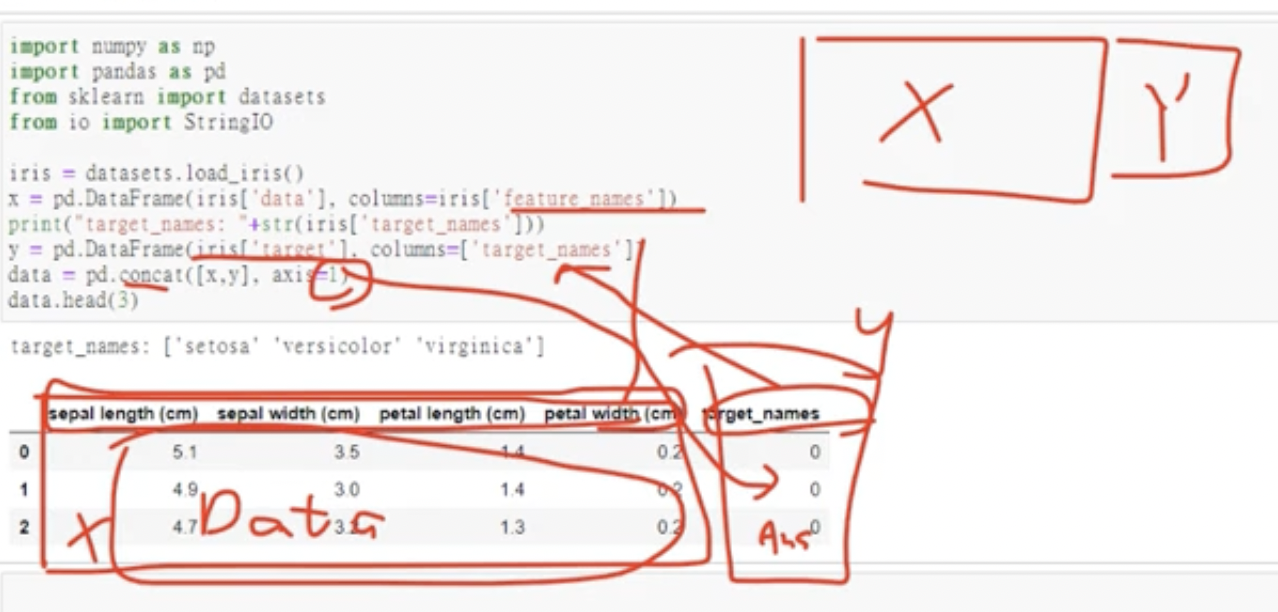

4個資料都做一次：

In [96]:
# 換行＋反斜線「\」
data['sepal length(cm)'] = (data['sepal length (cm)'] - data['sepal length (cm)'].min())/ \
                           (data['sepal length (cm)'].max() - data['sepal length (cm)'].min())

data['sepal width(cm)'] = (data['sepal width (cm)'] - data['sepal width (cm)'].min())/ \
                          (data['sepal width (cm)'].max() - data['sepal width (cm)'].min())
                        
data['petal length(cm)'] = (data['petal length (cm)'] - data['petal length (cm)'].min())/ \
                           (data['petal length (cm)'].max() - data['petal length (cm)'].min())

data['petal width(cm)'] = (data['petal width (cm)'] - data['petal width (cm)'].min())/ \
                          (data['petal width (cm)'].max() - data['petal width (cm)'].min())
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
0,5.1,3.5,1.4,0.2,0,0.222222,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,0.166667,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,0.111111,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,0.083333,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,0.194444,0.666667,0.067797,0.041667


## 資料標準化(Standardization)
經過Standardization資料的平均值會變為0, 標準差變為1

In [97]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [98]:
# 換行＋反斜線「\」
data['sepal length(cm)'] = (data['sepal length (cm)'] - data['sepal length (cm)'].mean())/ \
                           (data['sepal length (cm)'].std())
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,sepal length(cm),sepal width(cm),petal length(cm),petal width(cm)
0,5.1,3.5,1.4,0.2,0,-0.897674,0.625000,0.067797,0.041667
1,4.9,3.0,1.4,0.2,0,-1.139200,0.416667,0.067797,0.041667
2,4.7,3.2,1.3,0.2,0,-1.380727,0.500000,0.050847,0.041667
3,4.6,3.1,1.5,0.2,0,-1.501490,0.458333,0.084746,0.041667
4,5.0,3.6,1.4,0.2,0,-1.018437,0.666667,0.067797,0.041667
